<a href="https://colab.research.google.com/github/Antsistra/Stock-Price-Prediction-with-Linear-Regression/blob/main/Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [ ]:
stock_data = yf.download('BMRI.JK',period='6mo')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-25,7250.0,7250.0,7000.0,7250.0,7250.0,78212700
2024-03-26,7225.0,7225.0,7125.0,7175.0,7175.0,74274300
2024-03-27,7200.0,7250.0,7175.0,7175.0,7175.0,46295700
2024-03-28,7150.0,7250.0,7125.0,7250.0,7250.0,90900900
2024-04-01,7250.0,7250.0,6750.0,6900.0,6900.0,158358600


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=stock_data)

https://docs.google.com/spreadsheets/d/1FfeS8IDQuMscTdKVphTC_7Evxn33Fjf_nqnT3YKTdYk#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
# Menggunakan hanya kolom 'Close' untuk prediksi
stock_data = stock_data[['Close']]

# Membuat fitur dengan nilai harga penutupan hari sebelumnya
stock_data['Target'] = stock_data['Close'].shift(-1)

# Hapus baris terakhir yang berisi NaN di 'Target'
stock_data.dropna(inplace=True)

# Melihat data yang sudah diproses
stock_data.head()


,Close,Target
Date,,
2024-03-25,7250.0,7175.0
2024-03-26,7175.0,7175.0
2024-03-27,7175.0,7250.0
2024-03-28,7250.0,6900.0
2024-04-01,6900.0,6900.0


In [ ]:
# Membagi data ke dalam X (fitur) dan y (target)
X = stock_data[['Close']].values
y = stock_data['Target'].values

# Membagi data ke dalam set pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Membuat dan melatih model linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)


In [ ]:
# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 10209.834731705649


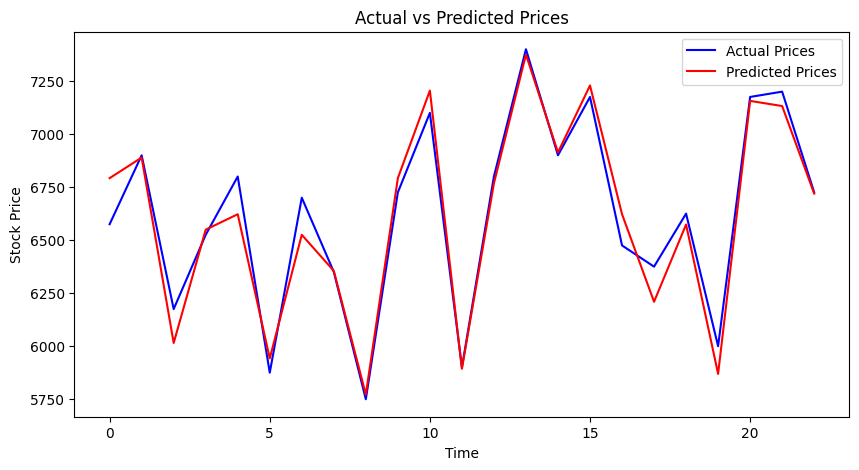

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Prices', color='b')
plt.plot(y_pred, label='Predicted Prices', color='r')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Prediksi harga saham untuk hari berikutnya
latest_price = stock_data['Close'].values[-1].reshape(-1, 1)
next_day_prediction = model.predict(latest_price)
print(f'Prediksi harga saham untuk hari berikutnya: {next_day_prediction[0]}')


Prediksi harga saham untuk hari berikutnya: 7374.922462397582


In [ ]:
del stock_data